# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [numpy](https://numpy.org/), [matplotlib](https://matplotlib.org/), și [sounddevice](https://python-sounddevice.readthedocs.io/).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

# Generarea unui semnal sinusoidal

Întâi trebuie să definim parametrii sinusoidei continuue:

* orizontul de timp ($t$)
* frecvența semnalului original ($f_0$)
* amplitudinea ($A$)
* faza ($\varphi$)

In [3]:
time_of_view = 1     # s
frequency = 2        # Hz
amplitude = 1
phase = 0

Iar apoi parametrii de măsurare, sinusoida discretizată:
* frecvența de eșantionare ($f_s$)
* perioada de eșantionare ($t_s$)
* numărul de eșantionare ($n$)

In [4]:
sampling_rate = 12    # Hz
sampling_period = 1./sampling_rate  # s
n_samples = time_of_view/sampling_period

Cu datele de mai sus putem genera orizontul de timp cu momentele de interes pentru semnalul continuu și cel discretizat ($t$, respectiv $nt_s$):

In [5]:
atime = np.linspace (0, time_of_view, int(10e5 + 1)) # s.
time = np.linspace (0, time_of_view, int(n_samples + 1))

*Observație*: orizontul de timp continuu (analog) este de fapt un orizont de timp discret ($nt_s$) foarte dens ($n=10^5$ eșantione).

Cu aceste date putem crea o funcție sinus ce generează sinusoidele parametrizate conform variabilelor de mai sus:

In [6]:
def sine (amplitude, frequency, time, phase):
    return amplitude * np.sin (2 * np.pi * frequency * time + phase)

## Sinusoidă continuă
Pentru a obține o sinusoidă "continuă" putem apela funcția ```sine```:

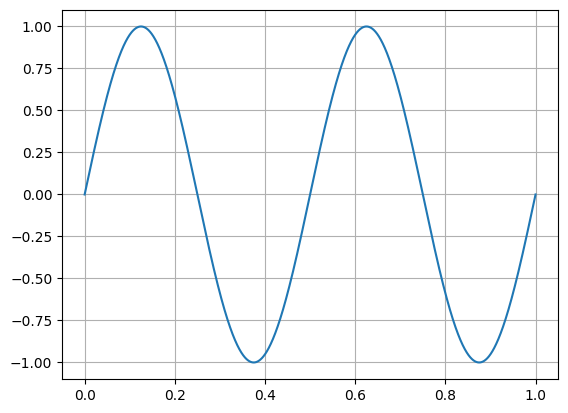

In [7]:
asignal = sine(amplitude, frequency, atime, phase)

plt.grid(True)
plt.plot (atime, asignal)

## Sinusoidă discretizată
Discretizarea se obține apelând aceiași funcție ```sine``` dar cu parametrii discreți și folosind ```stem``` pentru a obține cele $n$ eșantioane:

<StemContainer object of 3 artists>

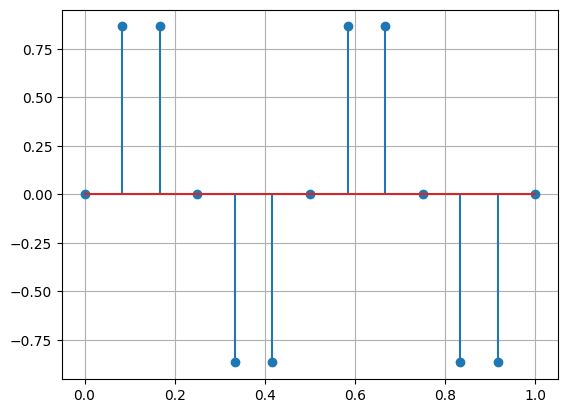

In [8]:
signal = sine(amplitude, frequency, time, phase)

plt.grid(True)
plt.stem (time, signal)

# Producerea și audiția unui ton

Pentru a produce o sinusoidă ce poate fi percepută de urechea umană trebuie să creștem frecvența și amplitudinea acesteia.

În exemplul de mai jos generăm o sinusoidă de frecvență $f_0=440\text{Hz}$ și amplitudine $10.000$ pe care o discretizăm cu frecvența de eșantionare $f_s=44.100\text{Hz}$ pe un orizont de timp de $2\text{s}$.

In [9]:
time_of_view = 2     # s
frequency = 440      # Hz
amplitude = 10000
phase = 0

sampling_rate = 44100
sampling_period = 1./sampling_rate  # s
n_samples = time_of_view/sampling_period
time = np.linspace (0, time_of_view, int(n_samples + 1))

tone = sine(amplitude, frequency, time, phase)

Aceast ton îl vom discretiza cu o frecvență de eșantionare $f_s$ conform ```sampling_rate``` și îl vom transforma în formatul WAV prin conversia eșantioanelor la întregi pe 16-biți:

In [10]:
sd.default.samplerate = sampling_rate
wav_wave = np.array(tone, dtype=np.int16)
sd.play(wav_wave, blocking=True)
sd.stop()

# Sarcini

1. [8p] Scrieți tonurile pentru notele muzicale Do, Re, Mi, Fa, Sol, La, Si, Do.

2. [8p] Compuneți un cântec simplu clasic (ex. Frère Jacques) într-un singur semnal.

3. [4p] Citiți o partitură la intrare (folosind [LilyPond](https://lilypond.org/) sau formatul propriu) și produceți semnalul ce conține melodia la ieșire prin compunerea tonurilor asociate notelor automat.

In [13]:
frequencies = [261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88, 523.25]


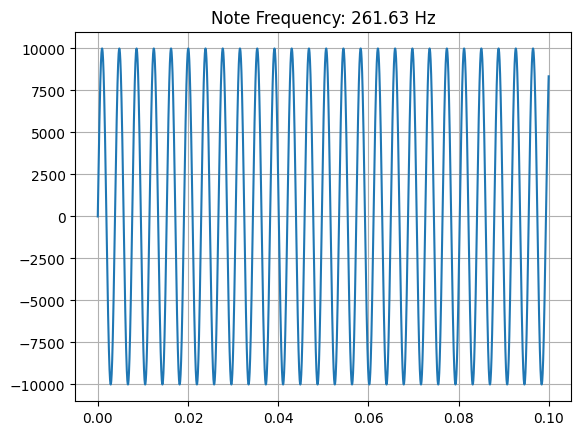

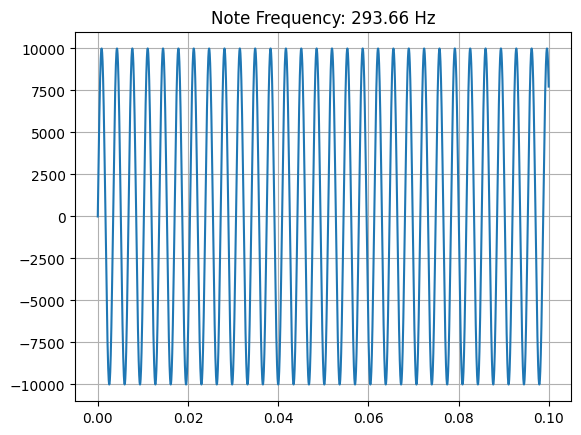

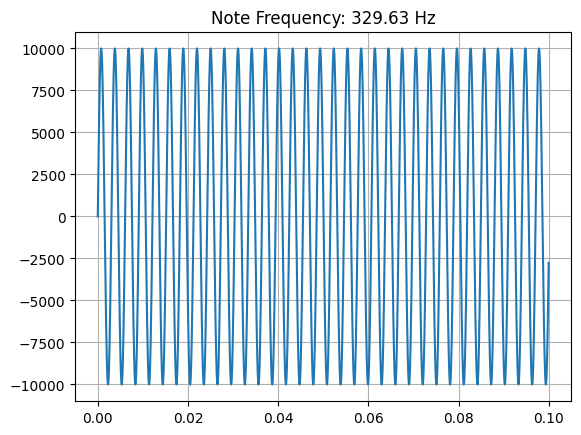

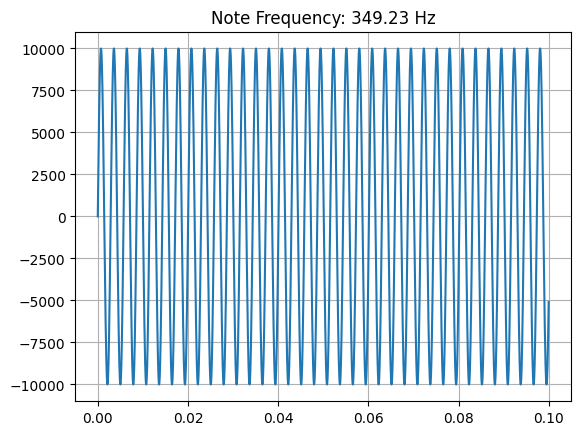

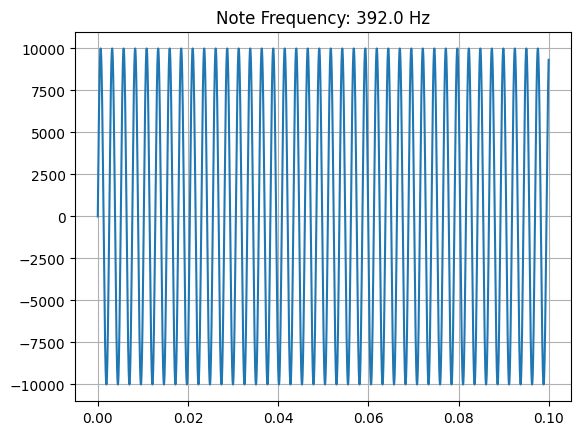

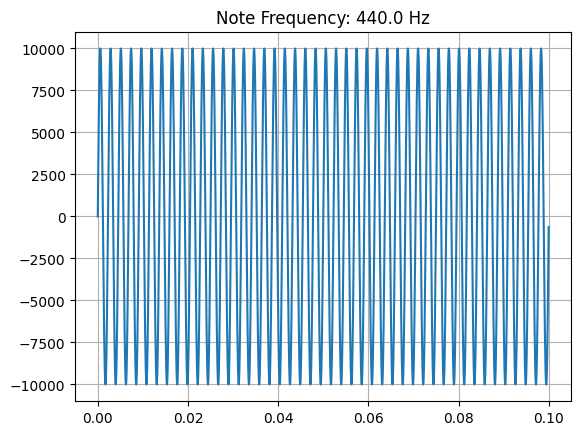

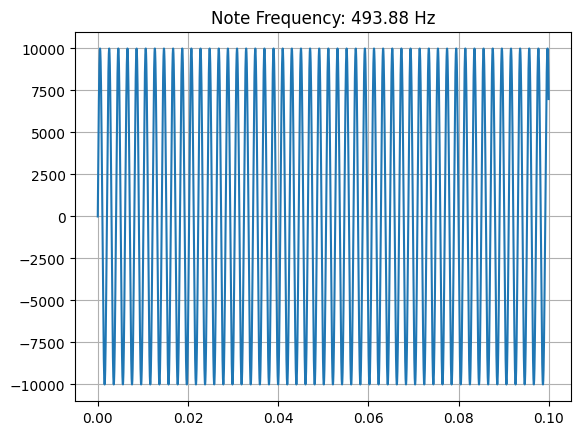

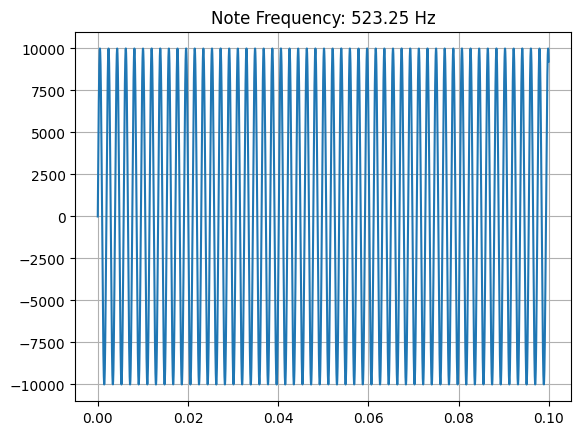

In [11]:
# Frecvențele note muzicale (Do, Re, Mi, Fa, Sol, La, Si, Do)

for frequency in frequencies:
    tone = sine(amplitude, frequency, time, phase)
    wav_wave = np.array(tone, dtype=np.int16)
    sd.play(wav_wave, sampling_rate)
    sd.wait()  

    
    #Pentru fiecare sunet am vrut sa si afisez cum ar arata graficul
    plt.figure()
    plt.grid(True)
    plt.plot(time[:44100//10], tone[:44100//10])  # Primul secund al tonului
    plt.title(f'Note Frequency: {frequency} Hz')
    plt.show()

In [16]:
note_to_freq = {'C': frequencies[0], 'D': frequencies[1], 'E': frequencies[2],
                'F': frequencies[3], 'G': frequencies[4], 'A': frequencies[5],
                'B': frequencies[6], 'C_high': frequencies[7], 'G#': 415.30}
song = np.array([])

In [12]:

note_duration = 0.4  # 400 ms
n_samples = int(note_duration * sampling_rate)
time = np.linspace(0, note_duration, n_samples)


for iteration, start_note in enumerate(['D', 'C', 'B', 'B']):  # Schimb nota de început pentru fiecare vers
    # Secvența de note
    song_notes = [start_note, start_note] + ['D', 'A', 'G#', 'G', 'F', 'D', 'F', 'G', 'C', 'C', 'D', 'A', 'G#', 'G', 'F', 'D', 'F', 'G']
    # Modific octava pentru notele care schimbă octava
    # din ce am observat, am aceeasi secventa de note (aprox), doar octava difera
    song_octaves = [3, 3] + [4 if note == 'D' or note == 'C' else 3 for note in song_notes[2:]]
    for note, octave in zip(song_notes, song_octaves):
        frequency = note_to_freq[note]
        frequency *= 2 ** (octave - 4)
        tone = sine(amplitude, frequency, time, phase)
        song = np.concatenate((song, tone))

sd.play(song, sampling_rate)
sd.wait()

In [17]:
song = np.array([])

In [18]:

# Daca nu ti-ai dat seama ca e Megalovania, (https://ro.pinterest.com/pin/626563366898289736/)
# atunci o sa las aici si Frère Jacques, care a fost mai usor de facut
# am incercat sa replic cat de mult am putut, dar cred ca trebuia sa schimb si durata
song_notes = ['C', 'D', 'E', 'C', 'C', 'D', 'E', 'C',
              'E', 'F', 'G', 'E', 'F', 'G',
              'G', 'A', 'G', 'F', 'E', 'C', 'G', 'A', 'G', 'F', 'E', 'C',
              'C_high', 'G', 'E', 'C', 'C_high', 'G', 'E', 'C']

for note in song_notes:
    frequency = note_to_freq[note]
    tone = sine(amplitude, frequency, time, phase)
    song = np.concatenate((song, tone))

sd.play(song, sampling_rate)
sd.wait()